## Project conducted by R.P.M. Kras, Vrije Universiteit Amsterdam 2023
### Bachelor of Science, Computer Science graduation project

### Imported libraries

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

### Load data and define feature columns and target variable

In [9]:
# Read data
data = pd.read_csv("datasets/heartdisease.csv")

# Define your feature columns and target variable
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

### Feature engineering: encode categorical data

In [10]:
# Feature engineering of the categorical data
label_encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col])
    label_encoders[col] = le

### Train test split and oversampling of minority classes

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Oversample the minority class to balance the dataset
oversampler = RandomOverSampler(random_state=1)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train, y_train)

### Training of the model on the balanced data

In [12]:
# Train the model on the balanced data
rf_model = RandomForestClassifier(random_state=1)  # Set a seed for reproducibility
rf_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred = rf_model.predict(X_test)

### Results

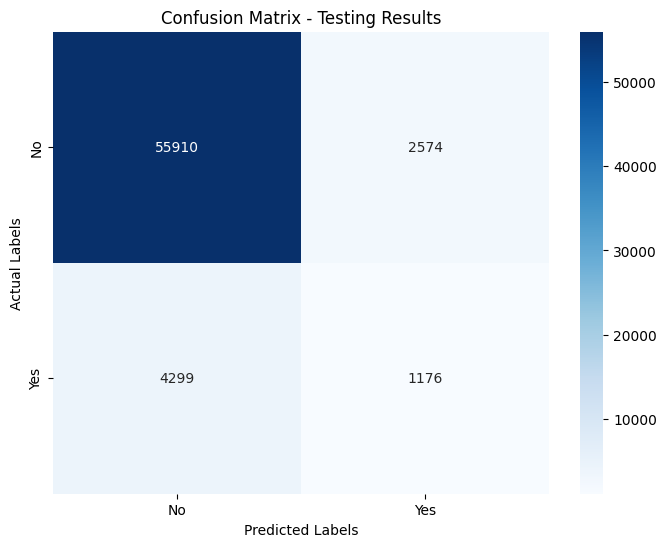

In [13]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Generate and display confusion matrix
class_labels = sorted(y.unique())  # Get unique class labels

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=class_labels)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Testing Results')
plt.show()